Refugees are people who are recognized as refugees under the 1951 Convention Relating to the Status of Refugees or its 1967 Protocol, the 1969 Organization of African Unity Convention Governing the Specific Aspects of Refugee Problems in Africa, people recognized as refugees in accordance with the UNHCR statute, people granted refugee-like humanitarian status, and people provided temporary protection. Asylum seekers--people who have applied for asylum or refugee status and who have not yet received a decision or who are registered as asylum seekers--are excluded. Palestinian refugees are people (and their descendants) whose residence was Palestine between June 1946 and May 1948 and who lost their homes and means of livelihood as a result of the 1948 Arab-Israeli conflict. Country of asylum is the country where an asylum claim was filed and granted.

Data before 2018 are from United Nations High Commissioner for Refugees (UNHCR), Statistics Database, Statistical Yearbook and data files, complemented by statistics on Palestinian refugees under the mandate of the UNRWA as published on its website. Data from UNHCR are available online at: www.unhcr.org/en-us/figures-at-a-glance.html. The data for 2018 are from UNHCR Global Trends report 2018 and World Bank's estimates (for Palestinian refugees in the UNRWA areas of operation).

## Refugee population by country or territory of asylum

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
file_name = "refugee_data.xls"
my_sheet = 'Data'

dfs1 = pd.read_excel(file_name, sheet_name=my_sheet)
dfs1 = dfs1.drop(columns=['Indicator Name', 'Indicator Code'])
dfs1 = dfs1.fillna(0)


dfs2 = pd.read_excel(file_name, sheet_name='regionData')
dfs2 = dfs2.drop(columns=['IncomeGroup', 'SpecialNotes', 'TableName'])
dfs2 = dfs2.fillna(0)


dfm = pd.merge(dfs1, dfs2, on='Country Code')
dfm = dfm.drop(columns=['Country Code'])
dfm = dfm.rename(columns={"Country Name": "name"})

dfm = dfm.melt(id_vars=["name","Region"], var_name="year", value_name="value").sort_values(['name','value'], ascending=True)
dfm['Region'] = np.where(dfm.Region == 0, 'NA', dfm.Region)

writer = pd.ExcelWriter('merged_refugee_data.xlsx', engine='xlsxwriter')
# Convert the dataframe to an XlsxWriter Excel object.
dfm.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()
dfm = dfm.astype({'year': 'int32'})
dfm.dtypes

df = dfm.copy()

print (df.head())

            name      Region  year  value
1    Afghanistan  South Asia  1960    0.0
222  Afghanistan  South Asia  1961    0.0
443  Afghanistan  South Asia  1962    0.0
664  Afghanistan  South Asia  1963    0.0
885  Afghanistan  South Asia  1964    0.0


Arab World
Central Europe and the Baltics
East Asia & Pacific (excluding high income)
Early-demographic dividend
Early-demographic dividend
East Asia & Pacific
Europe & Central Asia (excluding high income)
Europe & Central Asia
European Union
Fragile and conflict affected situations
High income
Heavily indebted poor countries (HIPC)
IBRD only
IDA & IBRD total
IDA total
IDA blend
IDA only
Not classified
Latin America & Caribbean (excluding high income)
Least developed countries: UN classification
Low income
Lower middle income
Low & middle income
Late-demographic dividend
Middle East & North Africa
OECD members
Other small states
Pre-demographic dividend
Post-demographic dividend
Sub-Saharan Africa
Sub-Saharan Africa (excluding high income)
Small states
East Asia & Pacific (IDA & IBRD countries)
Europe & Central Asia (IDA & IBRD countries)
Latin America & the Caribbean (IDA & IBRD countries)
Middle East & North Africa (IDA & IBRD countries)
South Asia (IDA & IBRD)
Sub-Saharan Africa (IDA & IBRD countries)
mUpper middle income



In [147]:
colors = dict(zip(
    ['Latin America & Caribbean', 'South Asia', 
     'Sub-Saharan Africa', 'Europe & Central Asia', 'NA', 
     'Middle East & North Africa', 'East Asia & Pacific', 'North America'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f', '#eafb50', '#eacc10']
))


group_lk = df.set_index('name')['Region'].to_dict()



def draw_barchart(year):
    # take the first 15 countries in descending order
    dff = df[df['year'].eq(year)].sort_values(by='value', ascending=False).head(15)
    ax.clear()
    ax.barh(dff['name'], dff['value'], color = [colors[group_lk[x]] for x in dff['name']])
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        ax.text(value-dx, i,name,size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,f'{value:,.0f}', size=14, ha='left',va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Refugees(thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Refugee influx from 1990 to 2019',transform=ax.transAxes, size=24, weight=600, ha='left')
    plt.box(False)    

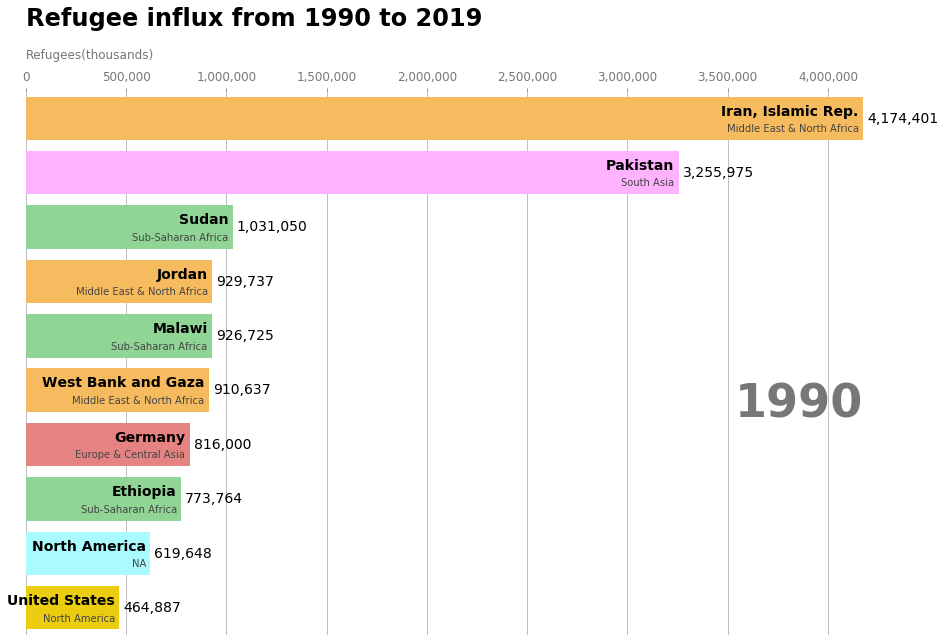

In [170]:
fig, ax = plt.subplots(figsize=(15, 10))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1990, 2019),interval=700)
HTML(animator.to_jshtml())


# Set up formatting for the movie files
writer = animation.FFMpegWriter(fps=10, metadata=dict(artist='Me'), bitrate=1800)

animator.save("C:\\Users\\chakr\\OneDrive\\Documents\\Projects\\ref.mp4", writer=writer)


## Refeguee Data as per country of origin

In [172]:
file_name = "refugee_data_origin.xls"
my_sheet = 'Data'

dfs1_origin = pd.read_excel(file_name, sheet_name=my_sheet)
dfs1_origin = dfs1_origin.drop(columns=['Indicator Name', 'Indicator Code'])
dfs1_origin = dfs1_origin.fillna(0)


dfs2_origin = pd.read_excel(file_name, sheet_name='regionData')
dfs2_origin = dfs2_origin.drop(columns=['IncomeGroup', 'SpecialNotes', 'TableName'])
dfs2_origin = dfs2_origin.fillna(0)


dfm_origin = pd.merge(dfs1_origin, dfs2_origin, on='Country Code')
dfm_origin = dfm_origin.drop(columns=['Country Code'])
dfm_origin = dfm_origin.rename(columns={"Country Name": "name"})

dfm_origin = dfm_origin.melt(id_vars=["name","Region"], var_name="year", value_name="value").sort_values(['name','value'], ascending=True)
dfm_origin['Region'] = np.where(dfm_origin.Region == 0, 'NA', dfm_origin.Region)

writer = pd.ExcelWriter('merged_refugee_origin_data.xlsx', engine='xlsxwriter')
# Convert the dataframe to an XlsxWriter Excel object.
dfm_origin.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()
dfm_origin = dfm_origin.astype({'year': 'int32'})
dfm_origin.dtypes

df_origin = dfm_origin.copy()

print (df_origin.head())

            name      Region  year  value
1    Afghanistan  South Asia  1960    0.0
223  Afghanistan  South Asia  1961    0.0
445  Afghanistan  South Asia  1962    0.0
667  Afghanistan  South Asia  1963    0.0
889  Afghanistan  South Asia  1964    0.0


In [189]:
colors = dict(zip(
    ['Latin America & Caribbean', 'South Asia', 
     'Sub-Saharan Africa', 'Europe & Central Asia', 'NA', 
     'Middle East & North Africa', 'East Asia & Pacific', 'North America'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f', '#eafb50', '#eacc10']
))


group_lk = df_origin.set_index('name')['Region'].to_dict()



def draw_barchart_origin(year):
    dff = df_origin[df_origin['year'].eq(year)].sort_values(by='value', ascending=True).tail(30)
    ax.clear()
    ax.barh(dff['name'], dff['value'], color = [colors[group_lk[x]] for x in dff['name']])
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        ax.text(value-dx, i,name,size=10, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=6, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,f'{value:,.0f}', size=14, ha='left',va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Refugee(Million)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Refugee population by country or territory of origin from 1990 to 2019',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    plt.box(False)    

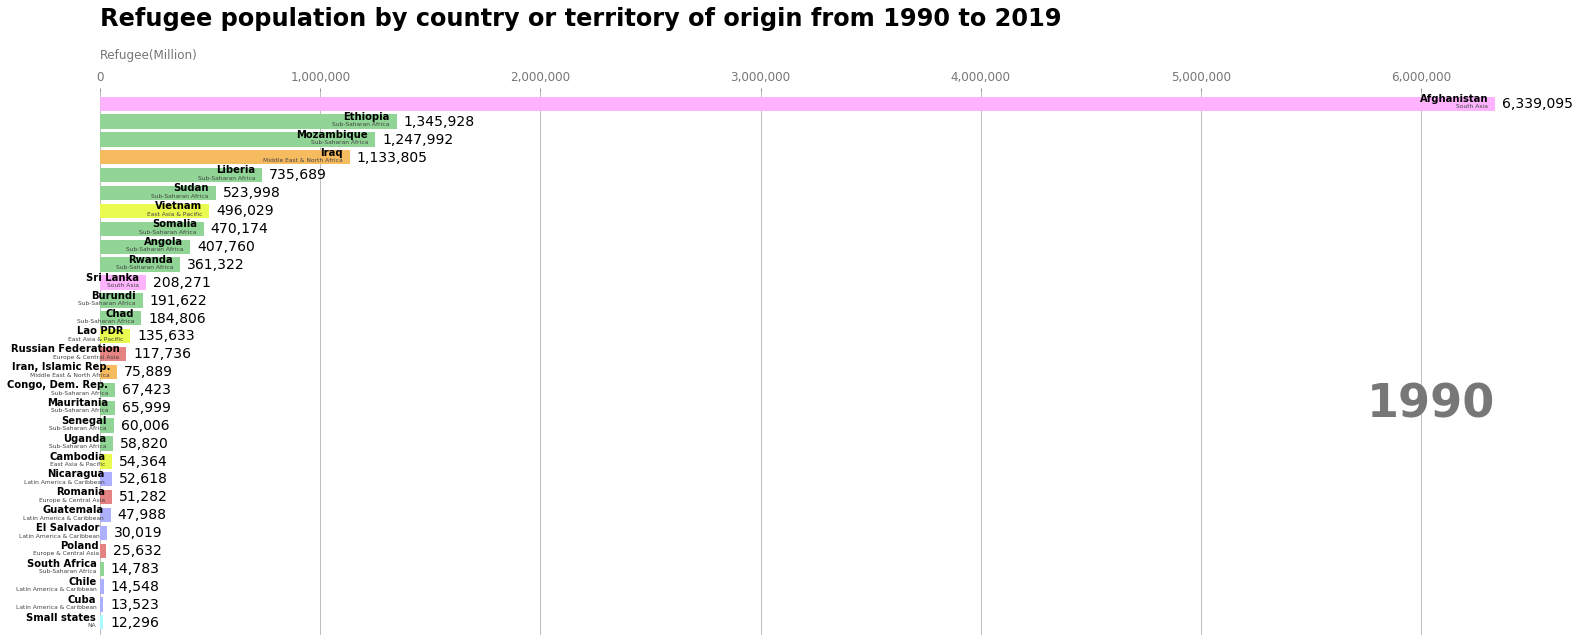

In [190]:
fig, ax = plt.subplots(figsize=(25, 10))
animator = animation.FuncAnimation(fig, draw_barchart_origin, frames=range(1990, 2019),interval=700)
HTML(animator.to_jshtml())


# Set up formatting for the movie files
writer = animation.FFMpegWriter(metadata=dict(artist='schakra'), bitrate=1800)

animator.save("C:\\Users\\chakr\\OneDrive\\Documents\\Projects\\ref_origin.mp4", writer=writer)